<a href="https://colab.research.google.com/github/Sarvesh1814/US-Book-Recommendation-System-/blob/main/Preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Data

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
user = pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/users.csv")
ratings = pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/ratings.csv")
books = pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 3/Books.csv")

<ipython-input-2-59280f8f1556>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 3/Books.csv")


# Preprocessing

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings = ratings[["User-ID","ISBN","Book-Rating"]]
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276744,038550120X,7
3,276747,0060517794,9
4,276747,0451192001,0


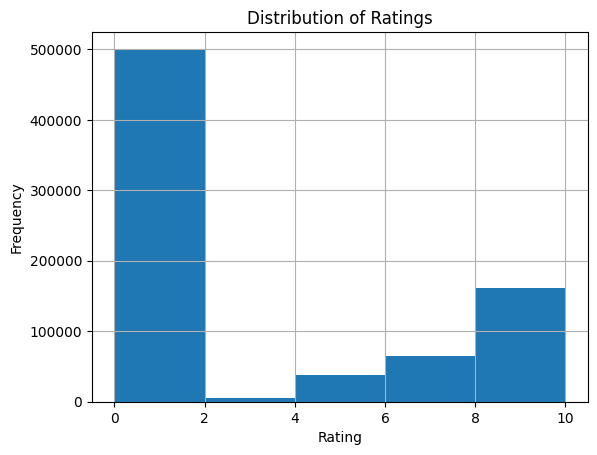

In [ ]:
ratings['Book-Rating'].hist(bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
# Dropping the rows with 0 rating data as it will create ambiguity and will deviate model
df = ratings.drop(ratings[ratings['Book-Rating'] == 0].index)

In [ ]:
# Considering those books which are rated more than 5 times 
isbn_counts = df['ISBN'].value_counts()
filtered_df = df[df['ISBN'].isin(isbn_counts[isbn_counts > 5].index)]


In [ ]:
filtered_df['User-ID'] = filtered_df['User-ID'].astype(int)

<ipython-input-10-5e313ea661de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['User-ID'] = filtered_df['User-ID'].astype(int)


In [ ]:
# Splitting Data into train and test 
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)

In [ ]:
# Saving Data into CSV format
pivot_df.to_csv("/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/train_Matrix.csv")
test_df.to_csv("/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/test_df.csv")
train_df.to_csv("/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/train_df.csv")